# Numerical hydrodynamics - part 1
### Group members: Dominik Wolf, Hauke Lüdemann, Fraya Walberg

## Advection in 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to performe the different schemes

def num_integration(L, T, NT, initial, technique):
    dx = L/(len(initial)-1.)
    dt = T/(NT-1.)

    result = np.zeros((int(NT+1), len(initial)))
    result[0,:] = np.copy(initial)
    result[:,0] = initial[0]
    result[:,-1] = initial[-1]
    if (technique == 1):
        for i in range(1, NT+1):
            for k in range(1, (len(initial)-1)):
                result[i,k] = result[i-1,k] - (result[i-1, k+1]-result[i-1, k-1])/(2*dx)*dt
        return result

    elif (technique == 2):
        for i in range(1, NT+1):
            for k in range(1, len(initial)):
                result[i,k] = result[i-1,k] - (result[i-1, k]-result[i-1, k-1])/dx*dt
            result[i,-1] = initial[-1]
        return result

    elif (technique == 3):
        for i in range(1, NT+1):
            for k in range(0, (len(initial)-1)):
                result[i,k] = result[i-1, k] - (result[i-1, k+1]-result[i-1, k])/dx*dt
            result[i,0] = initial[0]
        return result

### Plots for 1) - 3)

In [3]:
L = 10.
NL = 100
T = 3.
NT = 100

bound_low = 1.
bound_up = 0.

initial = np.zeros(NL+2)
initial[:int((NL+2)/2.)] = 1.
initial[0] = bound_low
initial[-1] = bound_up

evolution_method_1 = num_integration(L, T, NT, initial, 1)
evolution_method_2 = num_integration(L, T, NT, initial, 2)
evolution_method_3 = num_integration(L, T, NT, initial, 3)


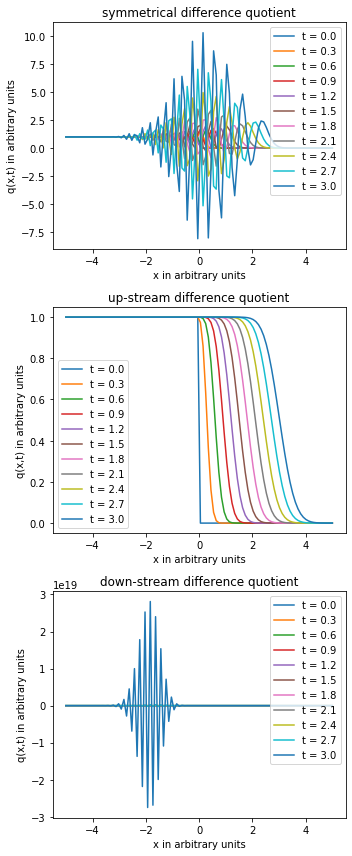

In [4]:
x = np.linspace(-L/2., L/2., num=(NL+2))

fig = plt.figure(figsize=(5, 12))
ax1 = fig.add_subplot(311)
ax1.set_title('symmetrical difference quotient')
ax1.set_ylabel('q(x,t) in arbitrary units')
ax1.set_xlabel('x in arbitrary units')
for i in range(0, len(evolution_method_1[:,0]), 10):
    ax1.plot(x, evolution_method_1[i,:], label='t = {}'.format(round(i*T/NT,1)))

## Stability due to additional diffusion term which damps oscillations.
ax2 = fig.add_subplot(312)
ax2.set_title('up-stream difference quotient')
ax2.set_ylabel('q(x,t) in arbitrary units')
ax2.set_xlabel('x in arbitrary units')
for i in range(0, len(evolution_method_2[:,0]), 10):
    ax2.plot(x, evolution_method_2[i,:], label='t = {}'.format(round(i*T/NT,1)))

ax3 = fig.add_subplot(313)
ax3.set_title('down-stream difference quotient')
ax3.set_ylabel('q(x,t) in arbitrary units')
ax3.set_xlabel('x in arbitrary units')
for i in range(0, len(evolution_method_3[:,0]), 10):
    ax3.plot(x, evolution_method_3[i,:], label='t = {}'.format(round(i*T/NT,1)))

plt.tight_layout()
ax1.legend()
ax2.legend()
ax3.legend()
plt.savefig('stability.pdf')
plt.show()

As it can be seen in the plots only the upwind scheme is stable.

### Part 4) - Set left boundary condition to 0.5 

In [5]:
bound_low = 0.5
bound_up = 0.

initial = np.zeros(NL+2)
initial[:int((NL+2)/2.)] = 1.
initial[0] = bound_low
initial[-1] = bound_up

result = num_integration(L, T, NT, initial, 2)

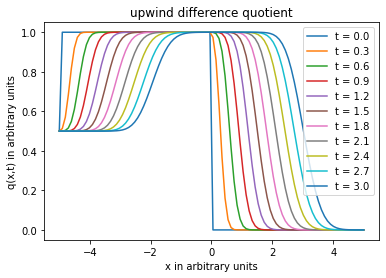

In [6]:
x = np.linspace(-L/2., L/2., num=(NL+2))

plt.title('upwind difference quotient')
plt.ylabel('q(x,t) in arbitrary units')
plt.xlabel('x in arbitrary units')
for i in range(0, len(result[:,0]), 10):
    plt.plot(x, result[i,:], label='t = {}'.format(round(i*T/NT,1)))
plt.legend()
plt.show()

Due to the change of the boundary condition we also observe a density variation for values x < 0. Hence, the medium is flowing from left to right.

### Part 5) - Set right boundary conditions to 0.5 

In [7]:
bound_low = 1.0
bound_up = 0.5

initial = np.zeros(NL+2)
initial[:int((NL+2)/2.)] = 1.
initial[0] = bound_low
initial[-1] = bound_up

result = num_integration(L, T, NT, initial, 2)

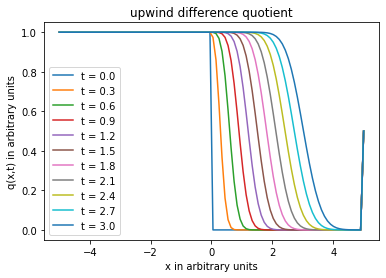

In [8]:
x = np.linspace(-L/2., L/2., num=(NL+2))

plt.title('upwind difference quotient')
plt.ylabel('q(x,t) in arbitrary units')
plt.xlabel('x in arbitrary units')
for i in range(0, len(result[:,0]), 10):
    plt.plot(x, result[i,:], label='t = {}'.format(round(i*T/NT,1)))
plt.legend()
plt.show()

Changing the boundary condition on the right side leads to discontinuity because the medium flows form the left to the right.

### Part 6) - Smaller time steps

In [9]:
L = 10.
NL = 100
T = 3.
NT = 1000

bound_low = 1.
bound_up = 0.

initial = np.zeros(NL+2)
initial[:int((NL+2)/2.)] = 1.
initial[0] = bound_low
initial[-1] = bound_up

result_1000 = num_integration(L, T, NT, initial, 2)

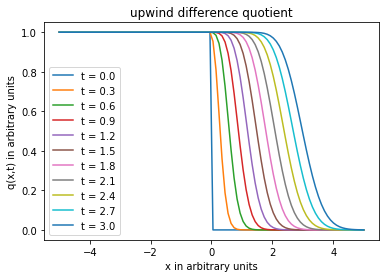

In [10]:
x = np.linspace(-L/2., L/2., num=(NL+2))

plt.title('upwind difference quotient')
plt.ylabel('q(x,t) in arbitrary units')
plt.xlabel('x in arbitrary units')
for i in range(0, len(result_1000[:,0]), 100):
    plt.plot(x, result_1000[i,:], label='t = {}'.format(round(i*T/NT,1)))
plt.legend()
plt.show()

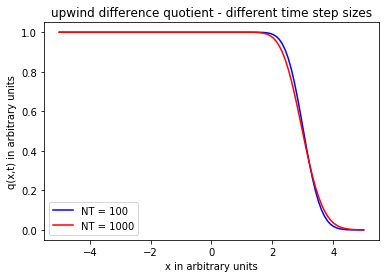

In [11]:
# Plot to compare the different time step sizes

plt.title('upwind difference quotient - different time step sizes')
plt.ylabel('q(x,t) in arbitrary units')
plt.xlabel('x in arbitrary units')
plt.plot(x, evolution_method_2[-1,:], 'b-', label='NT = 100')
plt.plot(x, result_1000[-1,:], 'r-', label='NT = 1000')
plt.legend()
plt.show()

As can be seen in the plot above using smaller time stepps leads to almost no difference in the result. The reason for this is that even using 100 time steps the time steps are small enaugh that int every iteration the information can't travel beyond more then one grid cell with the given velocity of 1. Therefore decreasing the size of the time steps does not lead to the capturing of significantly more information per iteration.

### Part 7) - Larger time steps

In [12]:
L = 10.
NL = 100
T = 3.
NT = 10

bound_low = 1.
bound_up = 0.

initial = np.zeros(NL+2)
initial[:int((NL+2)/2.)] = 1.
initial[0] = bound_low
initial[-1] = bound_up

result_10 = num_integration(L, T, NT, initial, 2)

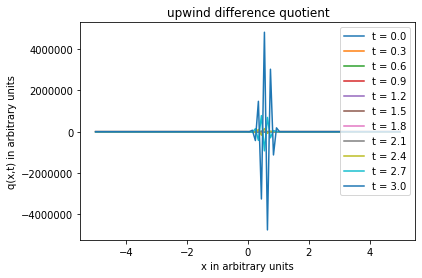

In [13]:
x = np.linspace(-L/2., L/2., num=(NL+2))

plt.title('upwind difference quotient')
plt.ylabel('q(x,t) in arbitrary units')
plt.xlabel('x in arbitrary units')
for i in range(0, len(result_10[:,0])):
    plt.plot(x, result_10[i,:], label='t = {}'.format(round(i*T/NT,1)))
plt.legend()
plt.show()

Courant-Friedrichs-Levy(CFL) timestep condition for stability not fulfilled.

## General-purpose 1D advection subroutine/function

In [14]:
def advect(qold, vold, dx, dt):
    """This function calculates the advection for arbitrary q and v.
    
    
    Args:
        qold (np.array()): Function q at current time step and initial conditions included. 
                           This function assumes that one ghost cell for every side containing the boundary conditions is included. 
        vold (np.array()): Velocity at current time step
        dx (float): Spacial step
        dt (float): Temporal step
        
    Returns:
        np.array(): Funcion at nect time step
    """
    evolution = np.zeros(np.shape(qold))
    for k in range(1, len(qold)-1):
        if (vold[k-1] >= 0):
            evolution[k] = qold[k] - vold[k-1]*(qold[k]-qold[k-1])/dx*dt
        else:
            evolution[k] = qold[k] - vold[k-1]*(qold[k+1]-qold[k])/dx*dt
    evolution[-1] = qold[-1]
    evolution[0] = qold[0]
    return evolution
    

### Part 8) - Test the function with constant velocity

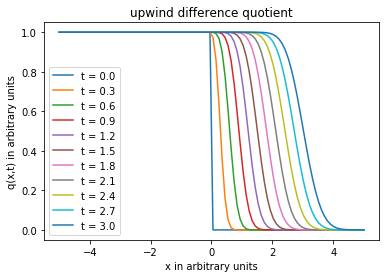

In [15]:
## initial conditions for exercise No.1.1.:

L = 10.
NL = 100
T = 3.
NT = 100

bound_low = 1.
bound_up = 0.

initial = np.zeros(NL+2)
initial[:int((NL+2)/2.)] = 1.
initial[0] = bound_low
initial[-1] = bound_up

dx = L/(len(initial)-1.)
dt = T/(NT-1.)

v_init = np.ones(len(initial)-1)

result = np.zeros((int(NT+1), len(initial)))
result[0,:] = np.copy(initial)

for i in range(1, NT+1):
    result[i,:] = advect(result[i-1,:], v_init, dx, dt)

plt.title('upwind difference quotient')
plt.ylabel('q(x,t) in arbitrary units')
plt.xlabel('x in arbitrary units')
for i in range(0, len(result[:,0]), 10):
    plt.plot(x, result[i,:], label='t = {}'.format(round(i*T/NT,1)))
plt.legend()
plt.show()

The result is the same as in part 1.1

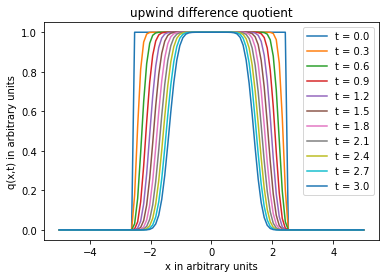

In [16]:
L = 10.
NL = 100
T = 3.
NT = 100

bound_low = 0.
bound_up = 0.

initial = np.zeros(NL+2)
initial[int((NL+2)/4.):int(3*(NL+2)/4.)] = 1.
initial[0] = bound_low
initial[-1] = bound_up

dx = L/(len(initial)-1.)
dt = T/(NT-1.)

v_init = -2*np.linspace(-L/2., L/2., num=(len(initial)-1))/L

result = np.zeros((int(NT+1), len(initial)))
result[0,:] = np.copy(initial)

x = np.linspace(-L/2., L/2., num=(NL+2))

for i in range(1, NT+1):
    result[i,:] = advect(result[i-1,:], v_init, dx, dt)
plt.title('upwind difference quotient')
plt.ylabel('q(x,t) in arbitrary units')
plt.xlabel('x in arbitrary units')
for i in range(0, len(result[:,0]), 10):
    plt.plot(x, result[i,:], label='t = {}'.format(round(i*T/NT,1)))
plt.legend()
plt.show()

Due to the velocity the initial density moves towards the center.